# Stats 131 Final Project
### Group: The S.S. Minnow Johnson


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Context and description of the data


In [2]:
games = pd.read_csv(r'C:\Users\Patrick Tawil\Desktop\Stats131\Stats131Project\Datasets\Video_Games_Sales.csv')

In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
games.shape

(16719, 16)

Background information on the subject and field of study

Information about data collection.

a. Who collected the data

b. When the data was collected

c. How the data was collected

d. Any implications this may have on analysis

# 2. Exploratory Data Analysis

In [6]:
games[games.Year_of_Release == 2020]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E


In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 1.6+ MB


                 Developer
Ubisoft                204
EA Sports              172
EA Canada              167
Konami                 162
Capcom                 139
EA Tiburon             108
Electronic Arts        104
Others                9040


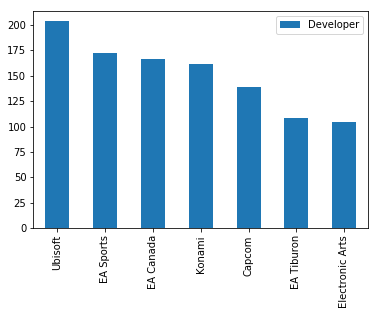

In [38]:
#eda: which developers make the most games
"""This will get the top N most frequent results from the column specified. If True, the Others parameter will also add a Others category
to merge up all the smaller values together."""

def get_top_n_frequency(df, n, col_name, others = True):
    df_count = df[col_name].value_counts()
    topN = pd.DataFrame(df_count[:n])
    if not others:
        return topN
    others = pd.Series({"Others" : df_count[n:].sum()}, name = col_name)
    others_df = pd.DataFrame(others)
    return topN.append(others_df)


top_devs_with_others = get_top_n_frequency(games, 7, "Developer", others=True)
print(top_devs_with_others)
top_devs_without_others = get_top_n_frequency(games, 7, "Developer", others=False)
top_devs_without_others.plot(kind = "bar")
plt.show()

In [ ]:
#data cleaning: make year Integer not Float, change game that has release year 2020 to 2009
#log transform global sales to make more normal

(array([1.6638e+04, 5.8000e+01, 1.3000e+01, 7.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e-02, 8.2620e+00, 1.6514e+01, 2.4766e+01, 3.3018e+01,
        4.1270e+01, 4.9522e+01, 5.7774e+01, 6.6026e+01, 7.4278e+01,
        8.2530e+01]),
 <a list of 10 Patch objects>)

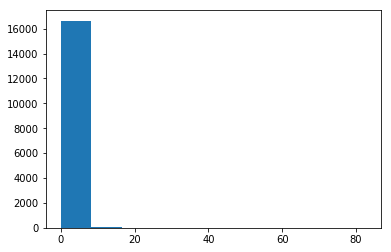

In [45]:
plt.hist(games.Global_Sales)

(array([1.725e+03, 2.718e+03, 3.291e+03, 3.830e+03, 2.867e+03, 1.567e+03,
        5.600e+02, 1.250e+02, 3.300e+01, 3.000e+00]),
 array([-4.60517019, -3.70333698, -2.80150378, -1.89967057, -0.99783737,
        -0.09600416,  0.80582904,  1.70766225,  2.60949545,  3.51132866,
         4.41316186]),
 <a list of 10 Patch objects>)

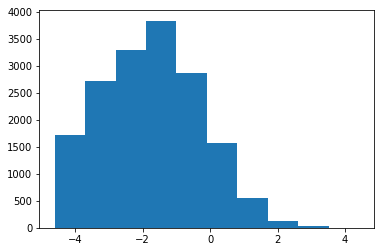

In [44]:
plt.hist(np.log(games.Global_Sales))

# 3. Data modeling